# Feature Scaling - Traffic Accidents

This notebook explores **2 approaches** to scale numeric features:
1. **StandardScaler** - Standardize features to zero mean and unit variance
2. **MinMaxScaler** - Scale features to a fixed range [0, 1]

Each approach is evaluated using Naive Bayes and KNN classifiers.

In [1]:
import sys
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, savefig, show
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sys.path.insert(1, '../../../../utils')
from dslabs_functions import get_variable_types
from studies import evaluate_and_plot

In [4]:
filename = "../../data/prepared/traffic_outliers_truncate_outliers.csv"

In [5]:
file_tag = "traffic"
metric="f1"
lab_folder_sca = "lab3_preparation/scaling"
target_name = "crash_type"

# Use best result from outliers step
# Option 1: Load from saved file
# filename = "../../data/prepared/traffic_outliers_truncate_outliers.csv"
# input_df = read_csv(filename, na_values="")

# Option 2: For now, recreate from encoding + truncate outliers
from dslabs_functions import NR_STDEV, determine_outlier_thresholds_for_var

data: DataFrame = read_csv(filename, na_values="")
variable_types: dict[str, list] = get_variable_types(data)
numeric_vars = variable_types['numeric']

# Apply truncate outliers (best from previous step)
input_df: DataFrame = data.copy(deep=True)
summary5: DataFrame = data[numeric_vars].describe()

for var in numeric_vars:
    top, bottom = determine_outlier_thresholds_for_var(summary5[var])
    input_df[var] = input_df[var].apply(
        lambda x: top if x > top else bottom if x < bottom else x
    )

print(f"Dataset shape: {input_df.shape}")
print(f"Numeric variables: {len(numeric_vars)}")

Dataset shape: (209306, 150)
Numeric variables: 11


## Approach 1: StandardScaler

Standardize features by removing the mean and scaling to unit variance.

Formula: `z = (x - mean) / std_dev`

In [6]:
approach_sca1 = "Standard-Scaler"

data_sca1 = input_df.copy()
target: Series = data_sca1.pop(target_name)

# Scale numeric features
numeric_df = data_sca1[numeric_vars].copy()
transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(numeric_df)
numeric_df_scaled = DataFrame(transf.transform(numeric_df), index=data_sca1.index)
data_sca1[numeric_vars] = numeric_df_scaled
data_sca1[target_name] = target

print(f"Scaled data shape: {data_sca1.shape}")
print("\nScaled numeric features statistics:")
print(data_sca1[numeric_vars].describe())

Scaled data shape: (209306, 150)

Scaled numeric features statistics:
         crash_date        damage     num_units  most_severe_injury  \
count  2.093060e+05  2.093060e+05  2.093060e+05        2.093060e+05   
mean  -5.196964e-15  2.672352e-16  2.055864e-16       -1.873905e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00        1.000002e+00   
min   -2.000338e+00 -2.152945e+00 -3.051846e+00       -5.664075e-01   
25%   -8.371775e-01 -1.155775e+00 -1.713498e-01       -5.664075e-01   
50%    1.102664e-02  6.270605e-01 -1.713498e-01       -5.664075e-01   
75%    8.616700e-01  6.270605e-01 -1.713498e-01        7.042238e-01   
max    1.702656e+00  6.270605e-01  3.245086e+00        2.037889e+00   

       injuries_total  injuries_non_incapacitating  \
count    2.093060e+05                 2.093060e+05   
mean    -1.140638e-17                -4.562552e-17   
std      1.000002e+00                 1.000002e+00   
min     -5.751642e-01                -4.326352e-01   
25%     -5.751642e-0

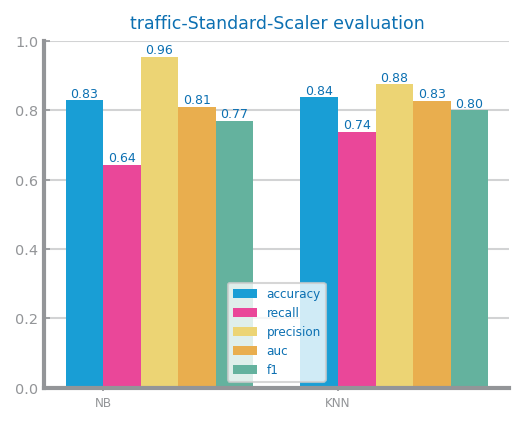

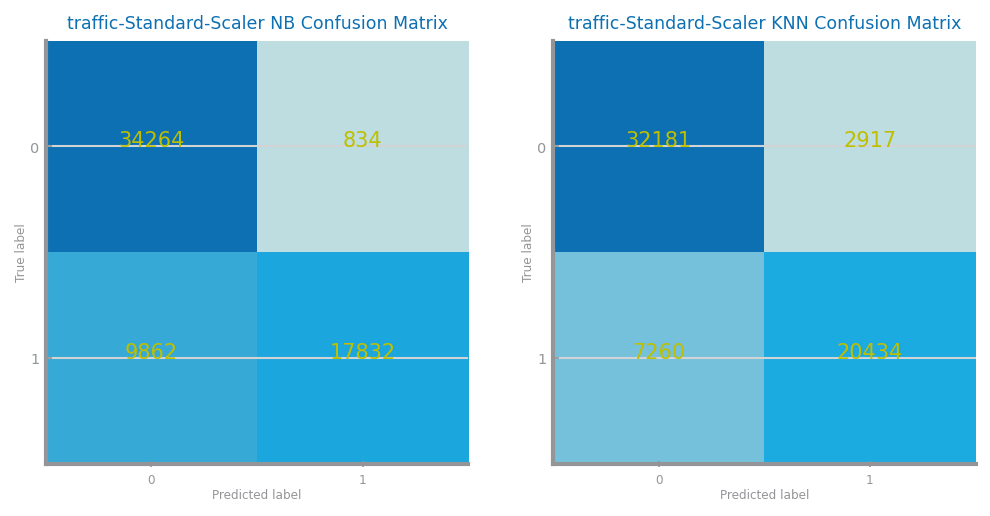

In [7]:
evaluate_and_plot(data_sca1, lab_folder_sca, file_tag, approach_sca1, target_name, metric=metric)

## Approach 2: MinMaxScaler

Transform features by scaling each feature to the range [0, 1].

Formula: `x_scaled = (x - x_min) / (x_max - x_min)`

In [8]:
approach_sca2 = "MinMax-Scaler"

data_sca2 = input_df.copy()
target: Series = data_sca2.pop(target_name)

# Scale numeric features
numeric_df = data_sca2[numeric_vars].copy()
transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_df)
numeric_df_scaled = DataFrame(transf.transform(numeric_df), index=data_sca2.index)
data_sca2[numeric_vars] = numeric_df_scaled
data_sca2[target_name] = target

print(f"Scaled data shape: {data_sca2.shape}")
print("\nScaled numeric features statistics:")
print(data_sca2[numeric_vars].describe())

Scaled data shape: (209306, 150)

Scaled numeric features statistics:
          crash_date         damage      num_units  most_severe_injury  \
count  209306.000000  209306.000000  209306.000000       209306.000000   
mean        0.540195       0.774439       0.484656            0.217490   
std         0.270052       0.359712       0.158808            0.383982   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.314114       0.358694       0.457444            0.000000   
50%         0.543173       1.000000       0.457444            0.000000   
75%         0.772890       1.000000       0.457444            0.487898   
max         1.000000       1.000000       1.000000            1.000000   

       injuries_total  injuries_non_incapacitating  \
count   209306.000000                209306.000000   
mean         0.194785                     0.157012   
std          0.338661                     0.362920   
min          0.000000                     0.000

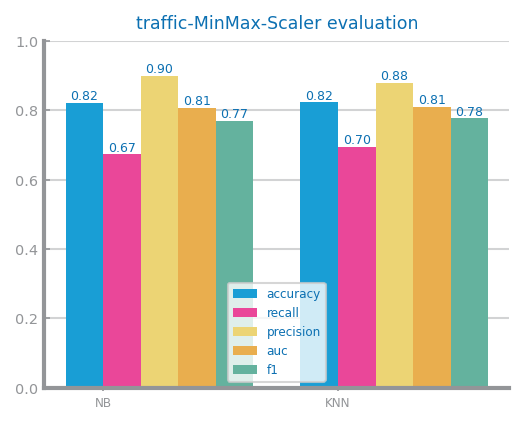

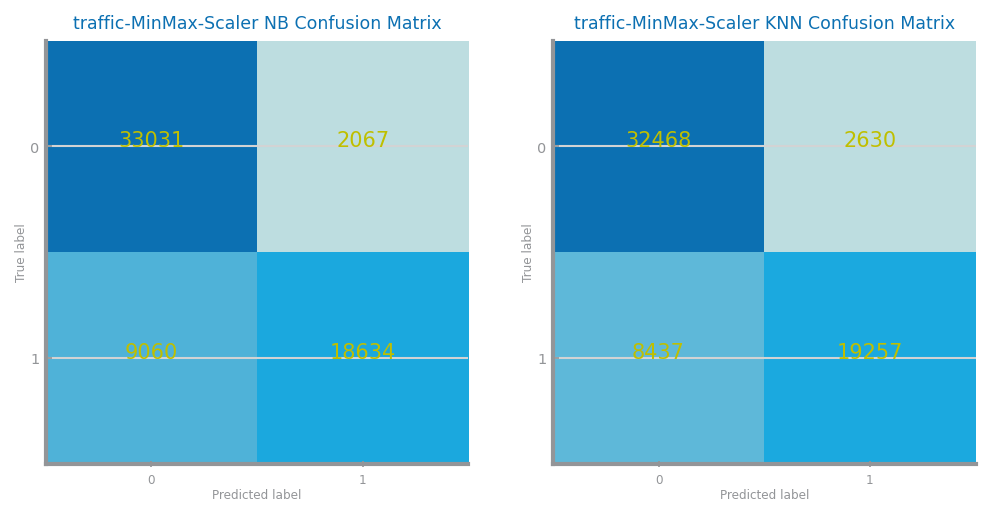

In [9]:
evaluate_and_plot(data_sca2, lab_folder_sca, file_tag, approach_sca2, target_name, metric=metric)

## Save Best Result

Based on evaluation metrics, save the best performing approach.

In [11]:
# Uncomment to save individual results
data_sca1.to_csv(f"../../data/prepared/{file_tag}_scaling_{approach_sca1}.csv", index=False)
data_sca2.to_csv(f"../../data/prepared/{file_tag}_scaling_{approach_sca2}.csv", index=False)

best_scaling_df = data_sca1.copy()
print(f"Best approach: {approach_sca1}")
print(f"Shape: {best_scaling_df.shape}")

Best approach: Standard-Scaler
Shape: (209306, 150)
